In [34]:
import random
import matplotlib.pyplot as plt

class Agent:

    def __init__(self, initial_wealth):
        self.money = initial_wealth

    def allot_money(self):
        self.money = random.randint(100,500)


    def consume(self, seller, quantity, amount):
          self.money -= amount
          seller.money += amount

In [54]:
import numpy as np

class Simulation:

    def __init__(self, num_agents, initial_wealth, num_time_steps, buy_prob):
        self.num_agents = num_agents
        self.initial_wealth = initial_wealth
        self.num_time_steps = num_time_steps
        self.buy_prob = buy_prob
        self.agents = [Agent(initial_wealth) for _ in range(num_agents)]
        self.total_tax = 0

    def calculate_tax(self, wealth):
        scaled_wealth = wealth

        # Scale tax slabs based on the ratio of max_wealth to 1500000
        scaled_slab_1 = 109
        scaled_slab_2 = 218
        scaled_slab_3 = 327
        scaled_slab_4 = 435
        scaled_slab_5 = 544

        if scaled_wealth <= scaled_slab_1:
            return 0
        elif scaled_wealth <= scaled_slab_2:
            return 0.05 * (scaled_wealth - scaled_slab_1)
        elif scaled_wealth <= scaled_slab_3:
            return 0.1 * (scaled_wealth - scaled_slab_2) + 0.05 * (scaled_slab_2 - scaled_slab_1)
        elif scaled_wealth <= scaled_slab_4:
            return 0.15 * (scaled_wealth - scaled_slab_3) + 0.05 * (scaled_slab_2 - scaled_slab_1) + 0.1 * (scaled_slab_3 - scaled_slab_2)
        elif scaled_wealth <= scaled_slab_5:
            return 0.2 * (scaled_wealth - scaled_slab_4) + 0.05 * (scaled_slab_2 - scaled_slab_1) + 0.1 * (scaled_slab_3 - scaled_slab_2) + 0.15 * (scaled_slab_4 - scaled_slab_3)
        else:
            return 0.3 * (scaled_wealth - scaled_slab_5) + 0.05 * (scaled_slab_2 - scaled_slab_1) + 0.1 * (scaled_slab_3 - scaled_slab_2) + 0.15 * (scaled_slab_4 - scaled_slab_3) + 0.2 * (scaled_slab_5 - scaled_slab_4)

    def update_agents(self):
        random_indices = random.sample(range(self.num_agents), 2)
        agent1, agent2 = self.agents[random_indices[0]], self.agents[random_indices[1]]

        if random.random() < self.buy_prob:
              # Calculate transaction amount based on the formula provided
              transaction_amount = 0.25 * (agent1.money * agent2.money) / (agent1.money + agent2.money)
              agent1.consume(agent2, 1, transaction_amount)

    def deduct_tax(self):
        for agent in self.agents:
          tax=self.calculate_tax(agent.money)
          agent.money -= tax
          self.total_tax+=tax
        # print("post tax:",np.sum(agent.money for agent in self.agents)/10000)


    def redist(self):
        add_val=self.total_tax/self.num_agents
        for agent in self.agents:
          agent.money+=add_val
        # print("post redist",np.sum(agent.money for agent in self.agents)/10000)
        self.total_tax=0




    def run_simulation(self):
        for _ in range(self.num_time_steps):
            self.update_agents()

        self.deduct_tax()
        # print("total tax:",self.total_tax)
        self.redist()




iteration  1  complete
iteration  2  complete
iteration  3  complete
iteration  4  complete
iteration  5  complete
iteration  6  complete
iteration  7  complete
iteration  8  complete
iteration  9  complete
iteration  10  complete
iteration  11  complete
iteration  12  complete
iteration  13  complete
iteration  14  complete
iteration  15  complete
iteration  16  complete
iteration  17  complete
iteration  18  complete
iteration  19  complete
iteration  20  complete
iteration  21  complete
iteration  22  complete
iteration  23  complete
iteration  24  complete
iteration  25  complete
iteration  26  complete
iteration  27  complete
iteration  28  complete
iteration  29  complete
iteration  30  complete
iteration  31  complete
iteration  32  complete
iteration  33  complete
iteration  34  complete
iteration  35  complete
iteration  36  complete
iteration  37  complete
iteration  38  complete
iteration  39  complete
iteration  40  complete
iteration  41  complete
iteration  42  complete
i

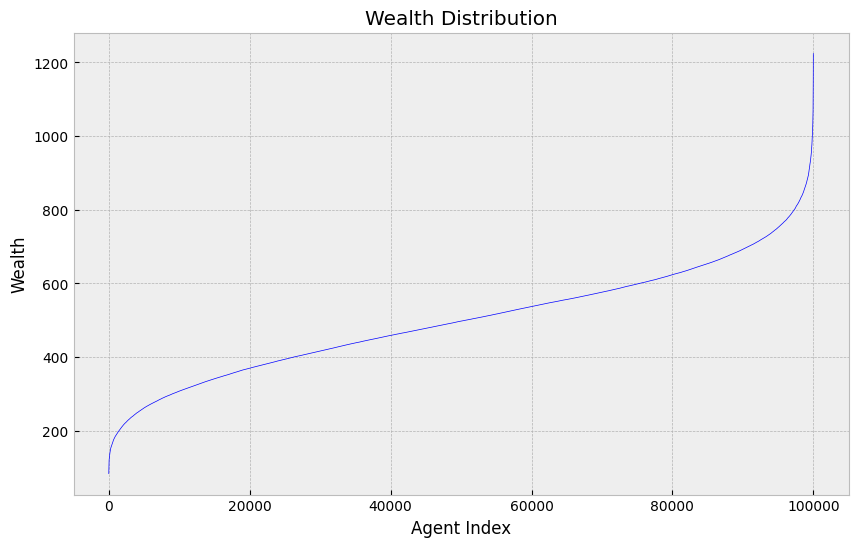

In [55]:
def gini_coefficient(wealths):
    n = len(wealths)
    if n == 0:
        return 0

    # Step 1: Sort the wealth list
    sorted_wealths = np.sort(wealths)

    # Step 2: Calculate the mean absolute difference
    diff_matrix = np.abs(sorted_wealths[:, None] - sorted_wealths)
    mean_abs_diff = np.mean(diff_matrix)

    # Step 3: Compute the mean wealth
    mean_wealth = np.mean(sorted_wealths)

    # Step 4: Compute the Gini coefficient
    gini_index = mean_abs_diff / (2 * mean_wealth)
    return gini_index

num_agents = 1000
initial_wealth = 500
num_time_steps = 10000
buy_prob = 0.2
coeff_variation=[]
gini_indices = []

# Initialize an empty list to store wealth distributions
all_wealth_distributions = []

# Initialize lists to store the wealth of specific agents over time
num_random_agents = 25
agent_wealth_over_time = {agent_id: [random.randint(100, 500)] for agent_id in range(num_agents)}

# Run simulation
sim = Simulation(num_agents, initial_wealth, num_time_steps, buy_prob)
for i in range(100):
    sim.run_simulation()
    print("iteration ", i+1, " complete")
    wealth_distribution = [agent.money for agent in sim.agents]
    all_wealth_distributions.append(wealth_distribution)

    # Store the wealth of specific agents over time
    for agent_id in agent_wealth_over_time:
        agent_wealth_over_time[agent_id].append(sim.agents[agent_id].money)

    # Calculate Gini index
    gini_index = gini_coefficient(wealth_distribution)
    gini_indices.append(gini_index)

# Flatten the list of wealth distributions
flattened_wealth_distributions = [wealth for distribution in all_wealth_distributions for wealth in distribution]

# Plot the wealth distribution curve
plt.figure(figsize=(10, 6))
plt.plot(sorted(flattened_wealth_distributions), color='blue', linewidth=0.5)
plt.title('Wealth Distribution')
plt.xlabel('Agent Index')
plt.ylabel('Wealth')
plt.grid(True)
plt.show()

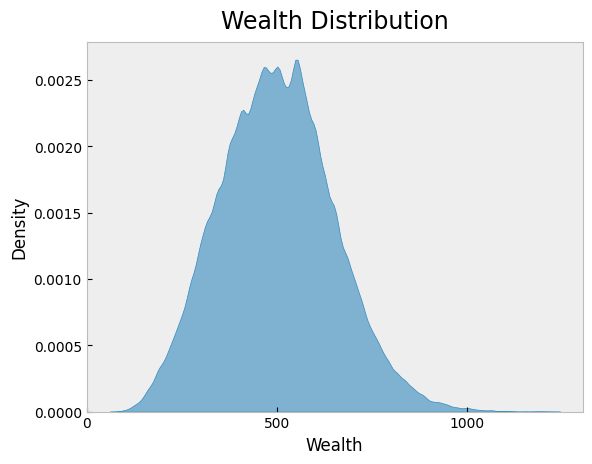

In [56]:
import seaborn as sns
plt.style.use("bmh")
sns.kdeplot(flattened_wealth_distributions, bw_adjust=0.5, fill=True, alpha=0.6)

# Set titles and labels
plt.title("Wealth Distribution", size=17, pad=10)
plt.xlabel("Wealth")
plt.ylabel("Density")
plt.grid(False)

# Set x-ticks
plt.xticks(range(0, int(max(flattened_wealth_distributions)) + 100, 500))

# Show the plot
plt.show()


In [57]:
gini_indices

[0.10616536448157504,
 0.13709999183442367,
 0.1475670188728827,
 0.15924166478199311,
 0.1647826885621907,
 0.16031577226318403,
 0.16978250614436996,
 0.17065945856258025,
 0.16867558373352204,
 0.16759625261891362,
 0.1644656162648396,
 0.164385635138118,
 0.1701678514412997,
 0.1706804801318462,
 0.17052736703660934,
 0.16860594975646193,
 0.17021889041756252,
 0.17419086561517103,
 0.17628454060040638,
 0.1776244700201677,
 0.1709069777675348,
 0.17265775254679677,
 0.16792609649760853,
 0.16598425146078097,
 0.1684752129793917,
 0.1639874778321593,
 0.16881372804432046,
 0.16533022023493824,
 0.16482711537211525,
 0.16708734441876302,
 0.1692571911790057,
 0.17039141374276986,
 0.16983857275956776,
 0.17689776930629672,
 0.17846408525750077,
 0.17637948766023287,
 0.1721274447236877,
 0.16848815778850895,
 0.1657212320208501,
 0.16916437239519502,
 0.172144047938862,
 0.17022691511906052,
 0.170112035489799,
 0.1727788504267171,
 0.17157197270336966,
 0.1713659462012229,
 0.17346

In [58]:
np.mean(gini_indices)

0.16863629277932446

In [39]:
# len(wealth_distribution_all[-1])
# sort_final_dist = sorted(wealth_distribution_all[-1])
# plt.plot(sort_final_dist)
# plt.xlabel("Agents")
# plt.ylabel("Wealth")
# plt.title("Final Iteration distribution")
# plt.grid(True)
# plt.show()

In [40]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you have collected wealth_distribution_all

# # Concatenate all wealth distributions
# all_wealth = np.concatenate(wealth_distribution_all)

# # Plot the histogram
# plt.figure(figsize=(10, 6))
# plt.hist(all_wealth, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# # Add labels and title
# plt.xlabel('Wealth')
# plt.ylabel('Probability Density')
# plt.title('Probability Distribution of Wealth')

# # Show the plot
# plt.show()


In [41]:
# wealth_distribution_sorted = np.sort(wealth_distribution)
# total_wealth = np.sum(wealth_distribution_sorted)
# cumulative_wealth = np.cumsum(wealth_distribution_sorted) / total_wealth
# cumulative_population = np.linspace(0, 1, len(cumulative_wealth))
# area_between_curves = np.trapz(cumulative_wealth, cumulative_population) - (0.5 - np.trapz(cumulative_population, cumulative_population))
# gini_index = area_between_curves / 0.5

# gini_indices.append(gini_index)
# flattened_wealth_distributions = [wealth for distribution in wealth_distribution_all for wealth in distribution]

# # Plot the wealth distribution curve
# plt.figure(figsize=(10, 6))
# plt.plot(sorted(flattened_wealth_distributions), color='blue', linewidth=0.5)
# plt.title('Wealth Distribution')
# plt.xlabel('Agent Index')
# plt.ylabel('Wealth')
# plt.grid(True)
# plt.show()

In [42]:
# plt.figure(figsize=(10, 6))
# for i in range(5):
#     # Get the wealth distribution of the ith subarray
#     wealth_distribution = wealth_distribution_all[i]
#     # Plot the wealth distribution
#     plt.plot(sorted(wealth_distribution), label=f'Subarray {i+1}')

# plt.title('Wealth Distribution of First 10 Subarrays')
# plt.xlabel('Agent Index')
# plt.ylabel('Wealth')
# plt.legend()
# plt.grid(True)
# plt.show()